In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

In [9]:
#Reading spam.csv file using pandas
df=pd.read_csv("https://raw.githubusercontent.com/HARSHA1352/OIBSIP/main/spam.csv",encoding="latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [11]:
x=df["v2"] #feature
y=df["v1"] #label

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create a CountVectorizer object to convert text into numerical features
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create an SVM classifier
clf = svm.SVC()

# Train the classifier
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)


In [30]:
# Evaluate the classifier
from sklearn import metrics
accuracy=metrics.accuracy_score(y_pred,y_test)
classificationReport=metrics.classification_report(y_pred, y_test)
print("accuracy_score:",accuracy)
print("classification_report:")
print(classificationReport)

accuracy_score: 0.9796650717703349
classification_report:
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      1487
        spam       0.84      1.00      0.92       185

    accuracy                           0.98      1672
   macro avg       0.92      0.99      0.95      1672
weighted avg       0.98      0.98      0.98      1672



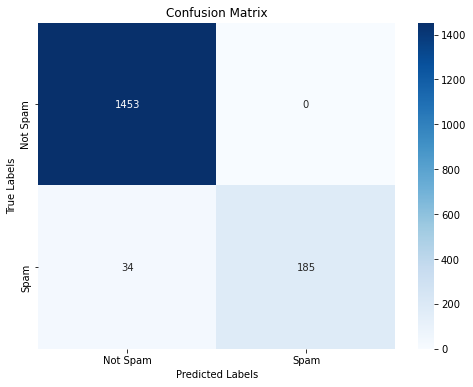

In [31]:
#Comparision of predicted output and actual output using matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
confusion_mat = metrics.confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
# Add labels to the x-axis and y-axis
tick_labels = ['Not Spam', 'Spam']
plt.xticks(ticks=[0.5, 1.5], labels=tick_labels)
plt.yticks(ticks=[0.5, 1.5], labels=tick_labels)

plt.show()


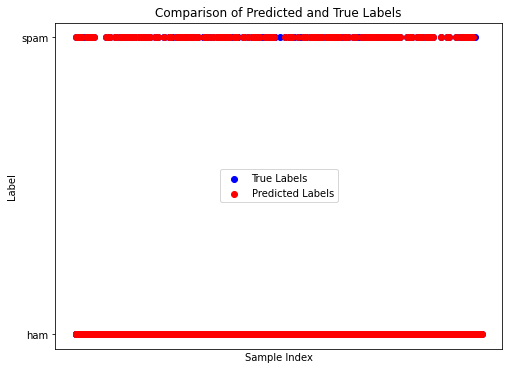

In [38]:
import matplotlib.pyplot as plt

# Assign numerical values to the categories
categories = {'ham': 0, 'spam': 1}
y_pred_num = [categories[label] for label in y_pred]
y_test_num = [categories[label] for label in y_test]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test_num, color='b', label='True Labels')
plt.scatter(range(len(y_pred)), y_pred_num, color='r', label='Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.title('Comparison of Predicted and True Labels')
plt.xticks([])
plt.yticks(list(categories.values()), list(categories.keys()))
plt.legend(loc="center")
plt.show()
